### Problem Statement
# X Education Online Learning Paltform
- X Education is a online learning platform which provide courses to industry professionals.
- The Company do marketing of there courses on various online platform and websites.
- The user who ever visit these platform they are redirect to the company official website for more detail and filling form for enquiry . Once the user (customer) fill the form they are marked as LEAD.
- The marketing team then contact these LEAD and give them offers to enrol them in courses.
- The Company currently has a LEAD conversion rate of 30% 
- The Company has a target of LEAD conversion to 80%.
- The Company want to know the lead score of the user (customer) so that they can build some strategy to achieve there goal.

### Steps 
1. Importing and loading Data
2. Data Cleaning 
3. Visualize the data
4. Data preprocessing
5. Building Model
6. Buliding Predication
7. Evaluting the Model
8. Business Recommendation

### Step 1 :-Importing  and Loading Data

In [1]:
# Import the required libarary
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Load the dataset Checking
Lead_raw=pd.read_csv("Leads.csv")
Lead_raw.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Checking the shape
Lead_raw.shape

(9240, 37)

In [5]:
# Checking the info
Lead_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking the Null Values
Lead_raw.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
# Descriptive analysis of the dataset
Lead_raw.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Step 2:- Data Cleaning

In [8]:
# Converting all string value to lower case
Lead_raw = Lead_raw.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
# Replacing the "Select" value to null Value 
Lead_raw=Lead_raw.replace("select", np.nan)

In [10]:
# Checking the column having high null values
round(Lead_raw.isnull().sum()/len(Lead_raw)*100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [11]:
# Dropping the variable having null value > 40% 
High_nan_variable=["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score"
                    ,"Asymmetrique Profile Score","Lead Quality","City","Lead Profile","Tags"]
Lead_raw=Lead_raw.drop(High_nan_variable,axis=1)


In [12]:
# Now checking the dataset again for dropping redundant variable
Lead_raw.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   india                      NaN                                NaN   
2   india  business administration                                NaN   
3   india    media and advertising                      word of mouth   
4   india                      NaN                              other   

  What is your current occupation  \
0                      unemployed   
1                      unemployed   
2                         student   
3                      unemployed   
4                      unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       better career prospects     no       no   
1                       better career prospects     no       no   
2                       better career prospects     no       no   
3                       better career prospects     no       no   
4                       better career prospects     no       no   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                no                 no        no                    no   
1                no                 no        no                    no   
2                no                 no        no                    no   
3                no                 no        no                    no   
4                no                 no        no                    no   

  Through Recommendations Receive More Updates About Our Courses  \
0                      no                                     no   
1                      no                                     no   
2                      no                                     no   
3                      no                                     no   
4                      no                                     no   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                no                        no   
1                                no                        no   
2                                no                        no   
3                                no                        no   
4                                no                        no   

  I agree to pay the amount through cheque  \
0                                       no   
1                                       no   
2                                       no   
3                                       no   
4                                       no   

  A free copy of Mastering The Interview Last 

In [13]:
# Checking the dataset columns
Lead_raw.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
# Creating the list of redundant variable
Redundant_variable=["Prospect ID","Lead Number","Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content"
                   ,"Get updates on DM Content","I agree to pay the amount through cheque"]
Lead_raw=Lead_raw.drop(Redundant_variable,axis=1)

In [15]:
# Now again checking the null value in dataset
round(Lead_raw.isnull().sum()/len(Lead_raw)*100,0)

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

- Tho the some column have very high Null value they stand important role in dataset as these column might have some crucial information that's why they are not drop
- So now we will substitute some values in place of these NaN values


In [16]:
# Now substituting "not given" in place of nan values in all categorical variable
Lead_raw["Specialization"]=Lead_raw["Specialization"].fillna("not given")

Lead_raw["How did you hear about X Education"]=Lead_raw["How did you hear about X Education"].fillna("not given")

Lead_raw["What is your current occupation"]=Lead_raw["What is your current occupation"].fillna("not given")

Lead_raw["What matters most to you in choosing a course"]=Lead_raw["What matters most to you in choosing a course"].fillna("not given")

Lead_raw["Country"]=Lead_raw["Country"].fillna("not given")


In [17]:
# Reducing the number of category in country column
def country_category(x):
    category=""
    if x=="india":
        category="India"
    elif x=="not given":
        category="not given"
    else :
        category="foreign country"
    return category

In [18]:
# Applying the function on Country column
Lead_raw["Country"]=Lead_raw.apply(lambda x:country_category(x["Country"]), axis=1)

In [19]:
# Now again checking for null value in dataset
round(Lead_raw.isnull().sum()/len(Lead_raw)*100,2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [20]:
# Dropping the null values rows
Lead_raw=Lead_raw.dropna(how="any")

In [21]:
# Now again checking for null value in dataset
round(Lead_raw.isnull().sum()/len(Lead_raw)*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [22]:
# Checking the shape of the dataframe
Lead_raw.shape

(9074, 22)

In [23]:
# Creating copy of the original dataset
Lead_final=Lead_raw

#Checking the info
Lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [24]:
# Descriptive analysis of data
Lead_final.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9074.000000  9074.000000                  9074.000000   
mean      0.378554     3.456028                   482.887481   
std       0.485053     4.858802                   545.256560   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    11.000000   
50%       0.000000     3.000000                   246.000000   
75%       1.000000     5.000000                   922.750000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
max               55.000000

- So here we can observe there is not such fluctuation in data means no outlier is present in data.
-  So now the dataset is cleaned and ready for model building and further evaluation

# Step 3- Data Visualization

In [25]:
# Once again checking the dataset
Lead_final.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      api      olark chat           no          no   
1                      api  organic search           no          no   
2  landing page submission  direct traffic           no          no   
3  landing page submission  direct traffic           no          no   
4  landing page submission          google           no          no   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity    Country           Specialization  \
0  page visited on website  not given                not given   
1             email opened      India                not given   
2             email opened      India  business administration   
3              unreachable      India    media and advertising   
4        converted to lead      India                not given   

  How did you hear about X Education What is your current occupation  \
0                          not given                      unemployed   
1                          not given                      unemployed   
2                          not given                         student   
3                      word of mouth                      unemployed   
4                              other                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   
3                       better career prospects     no                no   
4                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   
2                 no        no                    no                      no   
3                 no        no                    no                      no   
4                 no        no                    no                      no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified

## 3.1 Univariate Analysis 

###  Categorical variable

#### Data Imbalance

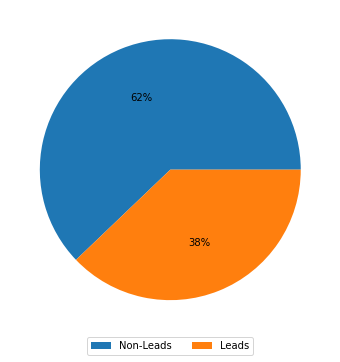

In [26]:
Label=["Non-Leads","Leads"]
plt.figure(figsize=(8,6))
plt.pie(Lead_final.Converted.value_counts(normalize=True),autopct='%1.0f%%')

plt.legend(labels=Label, loc='center', 
           bbox_to_anchor=(0.5, -0.04), ncol=6)
plt.show()

- Insights
 -  So here we can observe that the data has 38% of Lead data and 62% of Non-Lead data

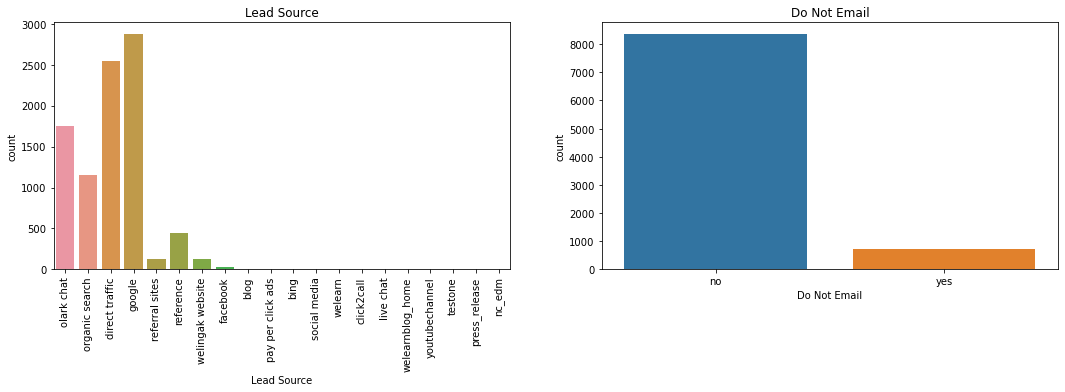

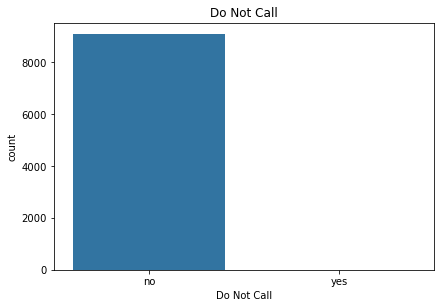

In [27]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(data=Lead_final,x="Lead Source")
plt.xticks(rotation=90)
plt.title("Lead Source")

plt.subplot(2,2,2)
sns.countplot(data=Lead_final,x="Do Not Email")
plt.title("Do Not Email")

plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
sns.countplot(data=Lead_final,x="Do Not Call")
plt.title("Do Not Call")

plt.show()

- Insights
 - From the above graph we can conclude that the google and direct traffic are the major Lead source.
 
 

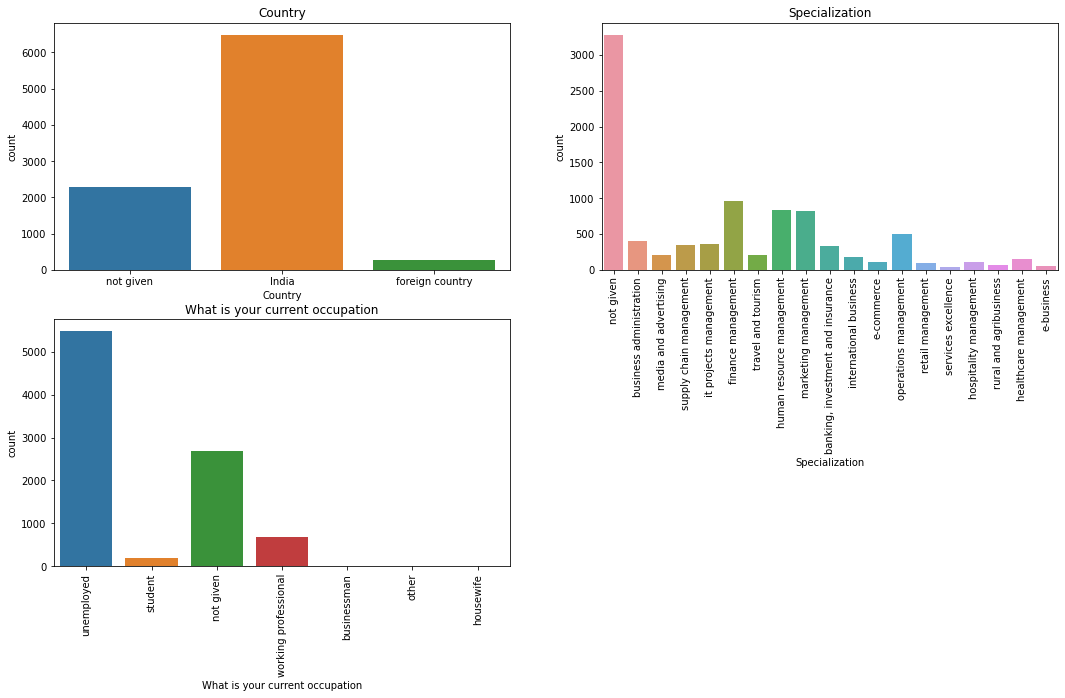

In [28]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(data=Lead_final,x="Country")
plt.title("Country")

plt.subplot(2,2,2)
sns.countplot(data=Lead_final,x="Specialization")
plt.xticks(rotation=90)
plt.title("Specialization")

plt.subplot(2,2,3)
sns.countplot(data=Lead_final,x="What is your current occupation")
plt.xticks(rotation=90)
plt.title("What is your current occupation")
plt.show()

- Insights
 - From the above graph we can conclude that many of the customer are from India and having knowledge in finance management,human resource management ,marketing management

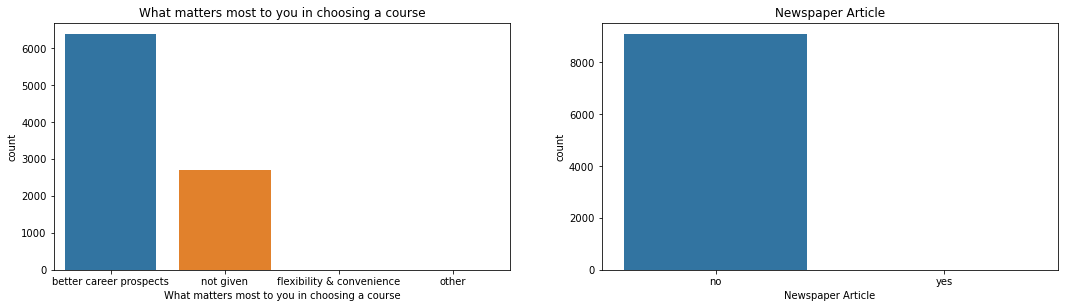

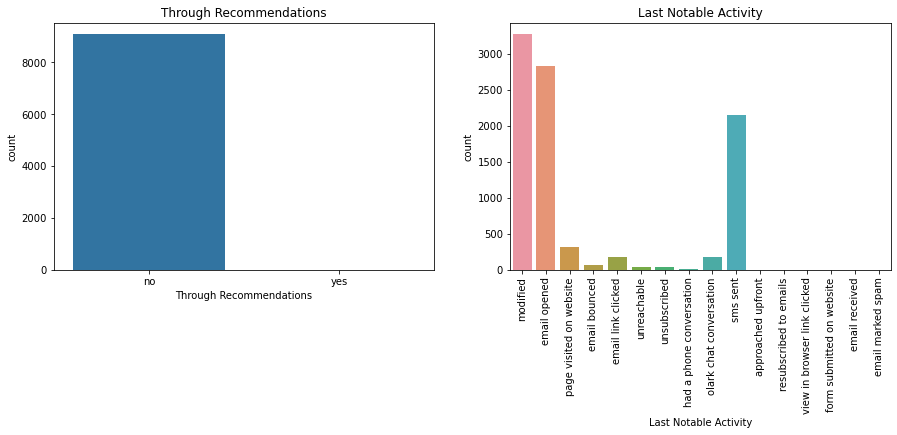

In [29]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(data=Lead_final,x="What matters most to you in choosing a course")
plt.title("What matters most to you in choosing a course")

plt.subplot(2,2,2)
sns.countplot(data=Lead_final,x="Newspaper Article")
plt.title("Newspaper Article")

plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
sns.countplot(data=Lead_final,x="Through Recommendations")
plt.title("Through Recommendations")

plt.subplot(2,2,4)
sns.countplot(data=Lead_final,x="Last Notable Activity")
plt.xticks(rotation=90)
plt.title("Last Notable Activity")

plt.show()

- Insights
 - Her we can say many customer want to enroll in course for better and bright career propects

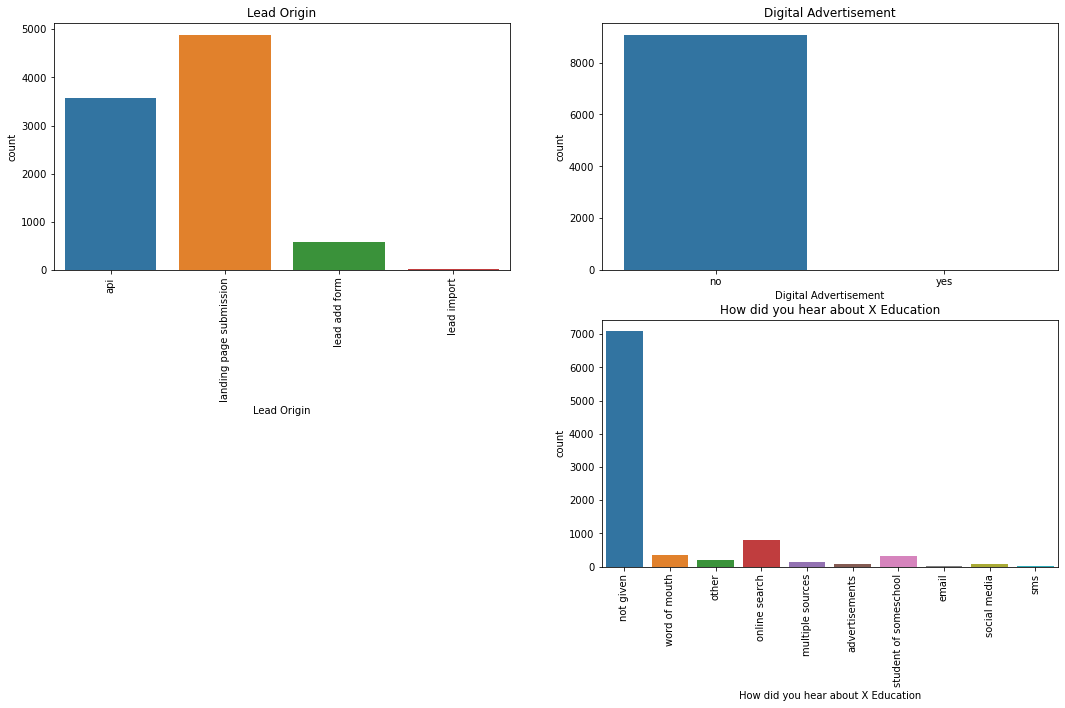

In [30]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(data=Lead_final,x="Lead Origin")
plt.xticks(rotation=90)
plt.title("Lead Origin")

plt.subplot(2,2,2)
sns.countplot(data=Lead_final,x="Digital Advertisement")
plt.title("Digital Advertisement")

plt.subplot(2,2,4)
sns.countplot(data=Lead_final,x="How did you hear about X Education")
plt.xticks(rotation=90)
plt.title("How did you hear about X Education")

plt.show()

- Insights
 -  From the above graph we can observe that most of the customer are coming from online serach.

###  Numerical variable

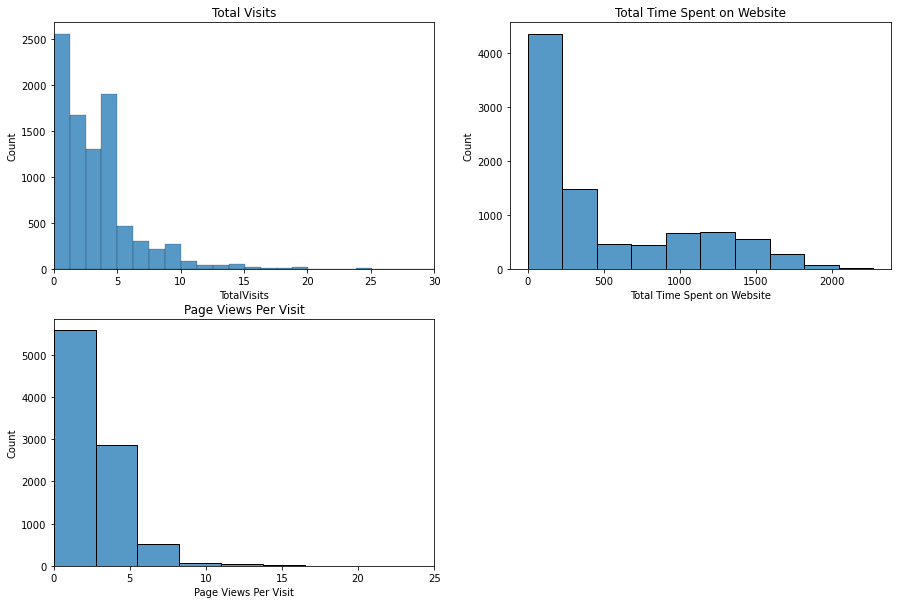

In [31]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.histplot(data=Lead_final,x="TotalVisits", bins = 200)
plt.title('Total Visits')
plt.xlim(0,30)

plt.subplot(2,2,2)
sns.histplot(data=Lead_final,x="Total Time Spent on Website", bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
sns.histplot(data=Lead_final,x="Page Views Per Visit", bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,25)
plt.show()

## 3.2 Bivariate Analysis

In [32]:
Lead_final.nunique()

Lead Origin                                         4
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

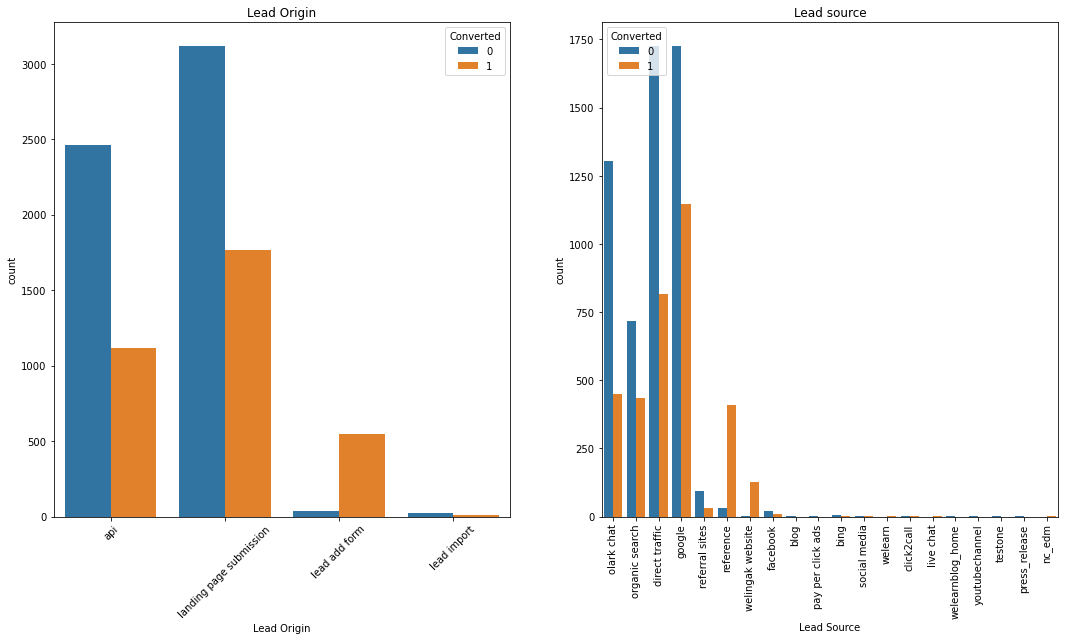

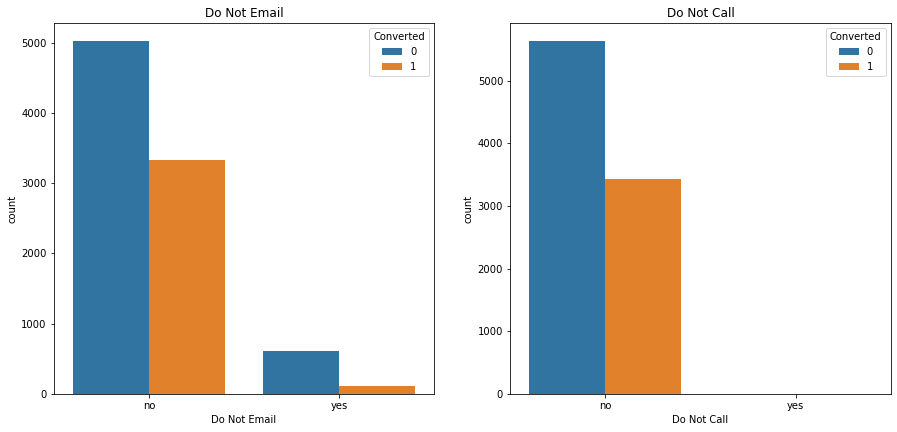

In [33]:
plt.figure(figsize=(18,20))

plt.subplot(221)
sns.countplot(data=Lead_final,x="Lead Origin",hue="Converted")
plt.xticks(rotation=45)
plt.title("Lead Origin")

plt.subplot(222)
sns.countplot(data=Lead_final,x="Lead Source",hue="Converted")
plt.xticks(rotation=90)
plt.title("Lead source")

plt.figure(figsize=(15,15))
plt.subplot(223)
sns.countplot(data=Lead_final,x="Do Not Email",hue="Converted")
plt.title("Do Not Email")

plt.subplot(224)
sns.countplot(data=Lead_final,x="Do Not Call",hue="Converted")
plt.title("Do Not Call")
plt.show()

- Insights
 - So here we can observe most of the user traffic are coming from google and about 70% of them are succesfully turn to LEAD.

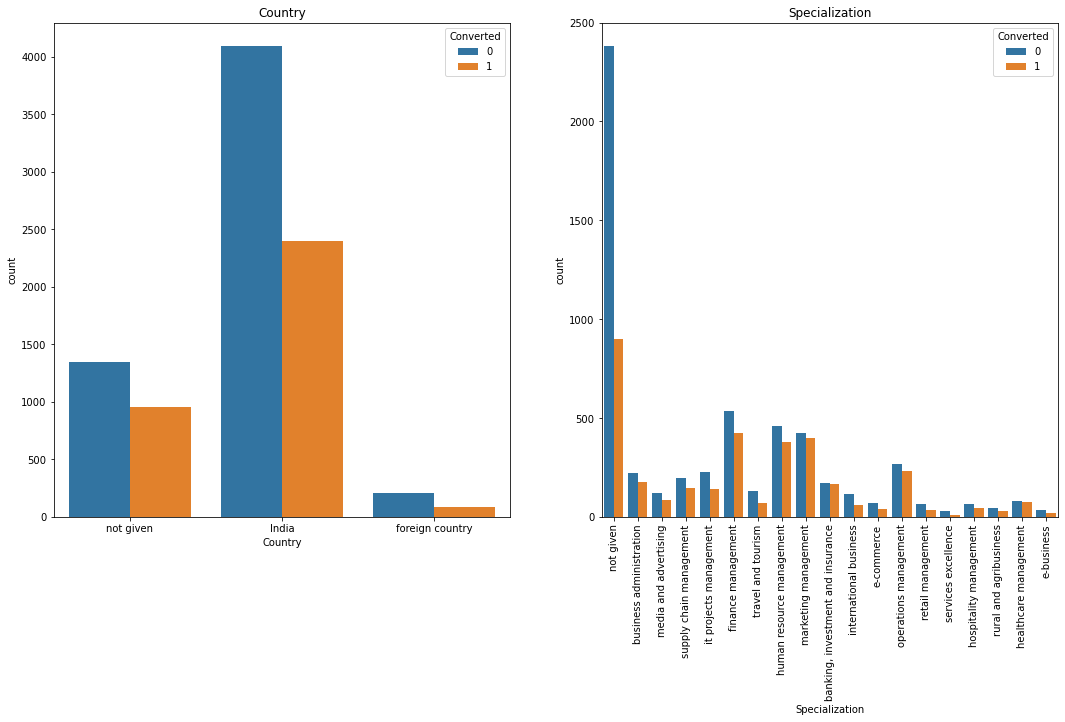

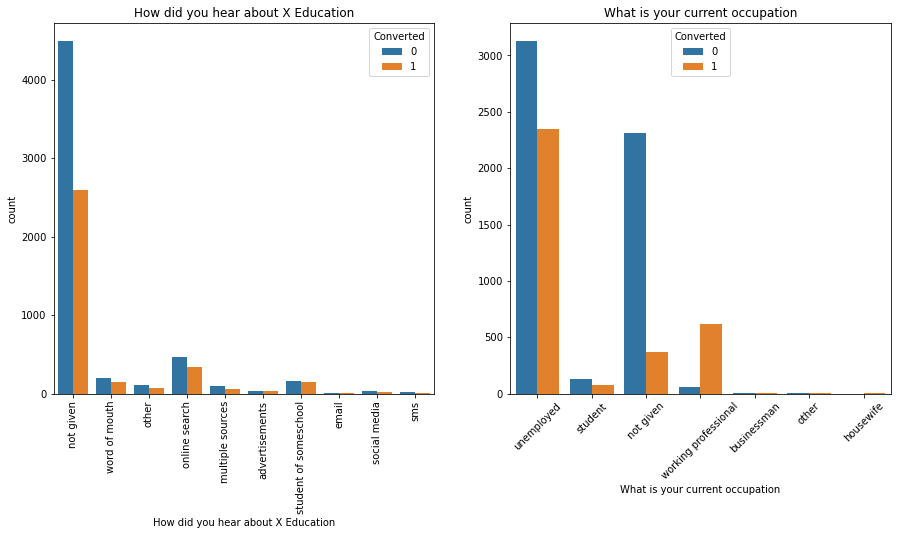

In [34]:
plt.figure(figsize=(18,20))

plt.subplot(221)
sns.countplot(data=Lead_final,x="Country",hue="Converted")
plt.title("Country")

plt.subplot(222)
sns.countplot(data=Lead_final,x="Specialization",hue="Converted")
plt.xticks(rotation=90)
plt.title("Specialization")


plt.figure(figsize=(15,15))
plt.subplot(223)
sns.countplot(data=Lead_final,x="How did you hear about X Education",hue="Converted")
plt.xticks(rotation=90)
plt.title("How did you hear about X Education")

plt.subplot(224)
sns.countplot(data=Lead_final,x="What is your current occupation",hue="Converted")
plt.xticks(rotation=45)
plt.title("What is your current occupation")
plt.show()

- Insights
 - Here we can conclude that the customer who have serching for the course are mostly unemployed and have good lead conversion rate but the customer who are working professional have high lead converison rate as out of 100 customer 90 customer have opt for the course

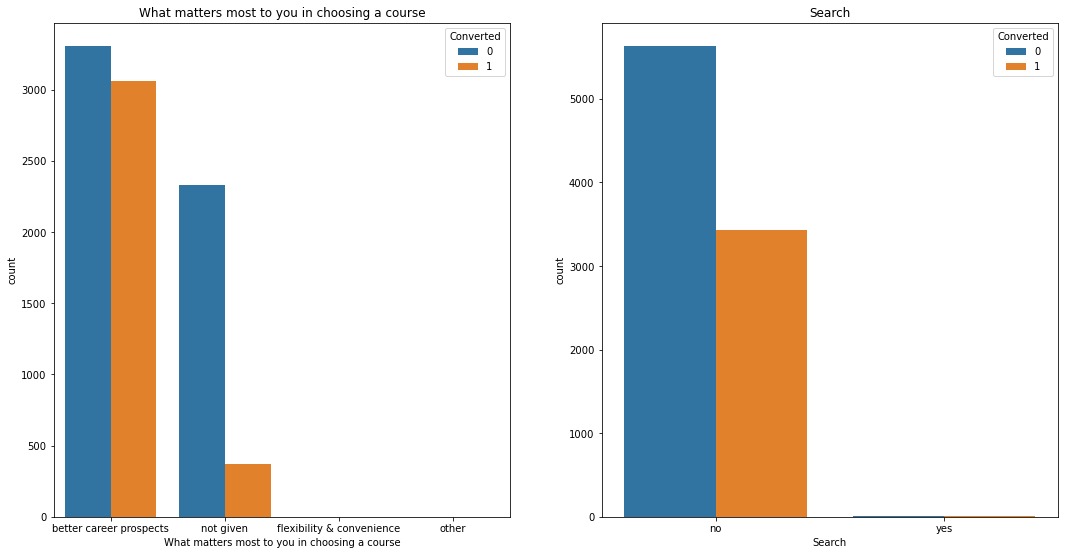

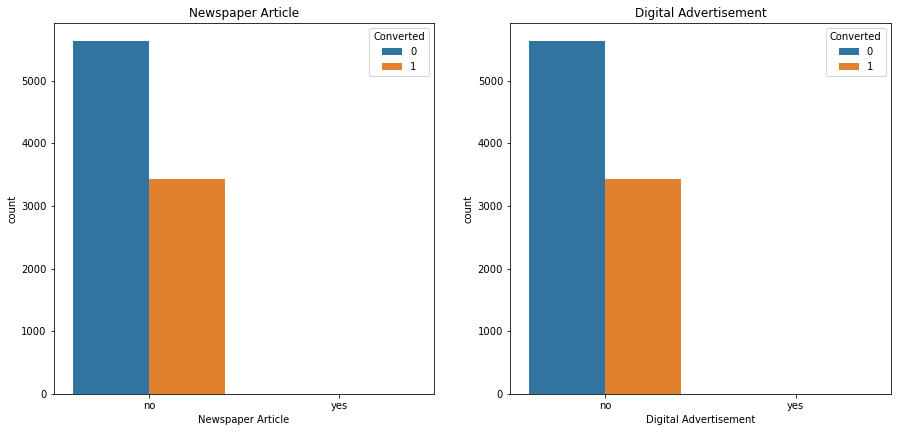

In [35]:
plt.figure(figsize=(18,20))

plt.subplot(221)
sns.countplot(data=Lead_final,x="What matters most to you in choosing a course",hue="Converted")
plt.title("What matters most to you in choosing a course")

plt.subplot(222)
sns.countplot(data=Lead_final,x="Search",hue="Converted")
plt.title("Search")


plt.figure(figsize=(15,15))
plt.subplot(223)
sns.countplot(data=Lead_final,x="Newspaper Article",hue="Converted")
plt.title("Newspaper Article")

plt.subplot(224)
sns.countplot(data=Lead_final,x="Digital Advertisement",hue="Converted")
plt.title("Digital Advertisement")
plt.show()

- Insights
 - Here we can conclude that customer are enrolling the course for better career prospect, also we can observe that the customer coming on the company website through newspaper article and digital advertisement have same lead rate.

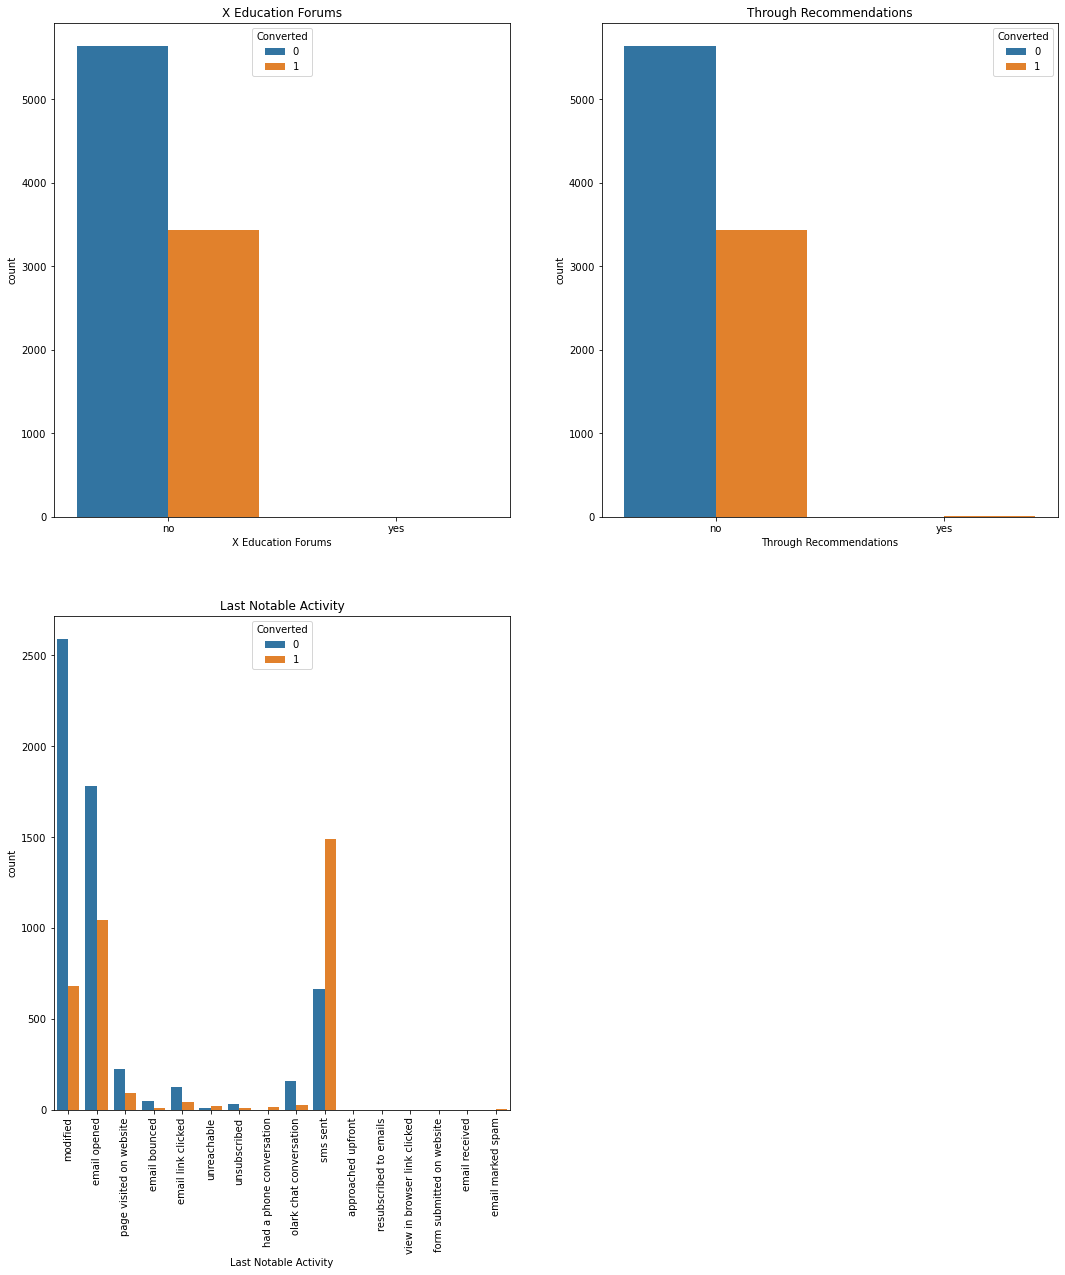

In [36]:
plt.figure(figsize=(18,20))

plt.subplot(221)
sns.countplot(data=Lead_final,x="X Education Forums",hue="Converted")
plt.title("X Education Forums")

plt.subplot(222)
sns.countplot(data=Lead_final,x="Through Recommendations",hue="Converted")
plt.title("Through Recommendations")

plt.subplot(223)
sns.countplot(data=Lead_final,x="Last Notable Activity",hue="Converted")
plt.xticks(rotation=90)
plt.title("Last Notable Activity")
plt.show()

- Insights
 - So here we can observe that the last notable activity of the user are "Modified,Email-Opened,Sms-Sent" and out of these 3 Lead rate is high in Sms-Sent.
 - Here we can also observe that the user come through some recommendation has about 60% to 65% of lead rate.

## 3.3 Multivariate Analysis

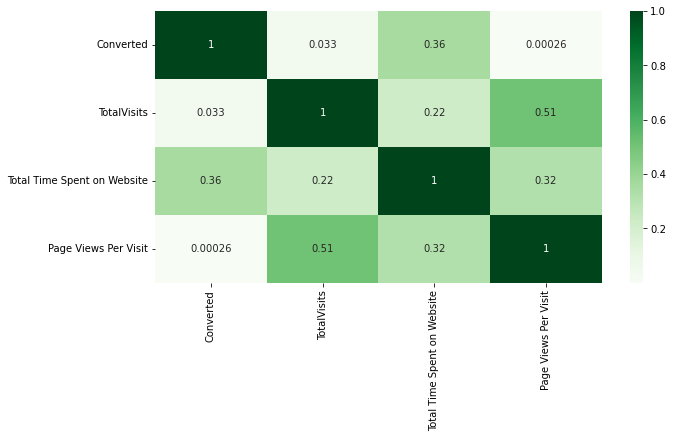

In [37]:
# Now checking correlation between numerical variable with heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data=Lead_final.corr(), annot=True,cmap="Greens")
plt.show()

- Insights
 - From above heatmap we can conclude that
    - The Total Time Spent on Website and Total Vists make positive correlation with Converted variable.
    - The Page view per visit have some sort of  negative correlation with Converted variable.

# Step 4 Data Preprocessing

## Dummy variable

In [38]:
# Checking the info of dataset
Lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [39]:
# Creating dummy variables of all categorical variable
Lead_dummy=pd.get_dummies(Lead_final[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','How did you hear about X Education', 'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)


In [40]:
# Merging dummy dataset with master dataset
Lead_final=pd.concat([Lead_final,Lead_dummy], axis=1)

# Dropping the original column from master dataset
Lead_final=Lead_final.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','How did you hear about X Education', 'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [41]:
# Checking the dataset once
Lead_final.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Lead Source_blog  Lead Source_click2call  \
0                        0                 0                       0   
1                        0                 0                       0   
2                        0                 0                       0   
3                        0                 0                       0   
4                        0                 0                       0   

   Lead Source_direct traffic  Lead Source_facebook  Lead Source_google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_live chat  Lead Source_nc_edm  Lead Source_olark chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_organic search  Lead Source_pay per click ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_press_release  Lead Source_reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_referral sites  Lead Source_social media  Lead Source_testone  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_welearn  Lead Source_welearnblog_home  \
0                    0                             0   
1                    0                             0   
2                    0                             0   
3                    0                             0   
4                    0                             0   

   Lead Source_welingak website  Lead Source_youtubechannel  Do Not Email_yes  \
0                             0                           0                 0   
1                             0                           0                 0   
2            

## Train-Test Split

In [42]:
# Import the Train-Test Split from the sklearn libary
from sklearn.model_selection import train_test_split


In [43]:
# Splitting the dataset in 70:30 ratio
Lead_final_train,Lead_final_test=train_test_split(Lead_final,train_size=0.7,random_state=100)


In [44]:
# Checking the train and test dataset
print( Lead_final_train.shape)
print( Lead_final_test.shape)

(6351, 104)
(2723, 104)


## Rescaling the feature

In [45]:
# Importing the Min-Max Scaler rescaler
from sklearn.preprocessing import MinMaxScaler

# Iniliaze the scaler
Scaler=MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
cat_col=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

# For Train dataset
Lead_final_train[cat_col]=Scaler.fit_transform(Lead_final_train[cat_col])

# For test dataset
Lead_final_test[cat_col]=Scaler.transform(Lead_final_test[cat_col])

In [46]:
# Checking the train dataset
Lead_final_train.head()

Converted  TotalVisits  Total Time Spent on Website  \
3009          0     0.007968                     0.178347   
1012          0     0.007968                     0.085355   
9226          0     0.000000                     0.000000   
4750          1     0.007968                     0.619946   
7987          1     0.019920                     0.711590   

      Page Views Per Visit  Lead Origin_landing page submission  \
3009              0.083333                                    1   
1012              0.083333                                    1   
9226              0.000000                                    0   
4750              0.083333                                    1   
7987              0.104167                                    1   

      Lead Origin_lead add form  Lead Origin_lead import  Lead Source_blog  \
3009                          0                        0                 0   
1012                          0                        0                 0   
9226                          0                        0                 0   
4750                          0                        0                 0   
7987                          0                        0                 0   

      Lead Source_click2call  Lead Source_direct traffic  \
3009                       0                           1   
1012                       0                           1   
9226                       0                           0   
4750                       0                           1   
7987                       0                           1   

      Lead Source_facebook  Lead Source_google  Lead Source_live chat  \
3009                     0                   0                      0   
1012                     0                   0                      0   
9226                     0                   0                      0   
4750                     0                   0                      0   
7987                     0                   0                      0   

      Lead Source_nc_edm  Lead Source_olark chat  Lead Source_organic search  \
3009                   0                       0                           0   
1012                   0                       0                           0   
9226                   0                       1                           0   
4750                   0                       0                           0   
7987                   0                       0                           0   

      Lead Source_pay per click ads  Lead Source_press_release  \
3009                              0                          0   
1012                              0                          0   
9226                              0                          0   
4750                              0                          0   
7987                              0                          0   

      Lead Source_reference  Lead Source_referral sites  \
3009                      0                           0   
1012                      0                           0   
9226                      0                           0   
4750                      0                           0   
7987                      0                           0   

      Lead Source_social media  Lead Source_testone  Lead Source_welearn  \
3009                         0                    0                    0   
1012                         0                    0                    0   
9226                         0                    0                    0   
4750                         0                    0                    0   
7987                         0                    0                    0   

      Lead Source_welearnblog_home  Lead Source_welingak website  \
3009                             0                             0   
1012                             0                             0   
9226                             0                             0   
4750 

In [47]:
# Descriptive analysis of train dataset
Lead_final_train.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  6351.000000  6351.000000                  6351.000000   
mean      0.385136     0.013831                     0.217585   
std       0.486666     0.020602                     0.244868   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.003984                     0.004492   
50%       0.000000     0.011952                     0.110961   
75%       1.000000     0.019920                     0.413522   
max       1.000000     1.000000                     1.000000   

       Page Views Per Visit  Lead Origin_landing page submission  \
count           6351.000000                          6351.000000   
mean               0.099046                             0.535979   
std                0.087462                             0.498743   
min                0.000000                             0.000000   
25%                0.041667                             0.000000   
50%                0.083333                             1.000000   
75%                0.138750                             1.000000   
max                1.000000                             1.000000   

       Lead Origin_lead add form  Lead Origin_lead import  Lead Source_blog  \
count                6351.000000              6351.000000       6351.000000   
mean                    0.068651                 0.003779          0.000157   
std                     0.252879                 0.061362          0.012548   
min                     0.000000                 0.000000          0.000000   
25%                     0.000000                 0.000000          0.000000   
50%                     0.000000                 0.000000          0.000000   
75%                     0.000000                 0.000000          0.000000   
max                     1.000000                 1.000000          1.000000   

       Lead Source_click2call  Lead Source_direct traffic  \
count             6351.000000                 6351.000000   
mean                 0.000472                    0.278066   
std                  0.021731                    0.448082   
min                  0.000000                    0.000000   
25%                  0.000000                    0.000000   
50%                  0.000000                    0.000000   
75%                  0.000000                    1.000000   
max                  1.000000                    1.000000   

       Lead Source_facebook  Lead Source_google  Lead Source_live chat  \
count           6351.000000         6351.000000            6351.000000   
mean               0.003936            0.320737               0.000315   
std                0.062622            0.466797               0.017744   
min                0.000000            0.000000               0.000000   
25%                0.000000            0.000000               0.000000   
50%                0.000000            0.000000               0.000000   
75%                0.000000            1.000000               0.000000   
max                1.000000            1.000000               1.000000   

       Lead Source_nc_edm  Lead Source_olark chat  Lead Source_organic search  \
count         6351.000000             6351.000000                 6351.000000   
mean             0.000157                0.186427                    0.127224   
std              0.012548                0.389482                    0.333250   
min              0.000000                0.000000                    0.000000   
25%              0.000000                0.000000                    0.000000   
50%              0.000000                0.000000                    0.000000   
75%              0.000000                0.000000                    0.000000   
max              1.000000                1.000000                    1.000000   

       Lead Source_pay per click ads  Lead Source_press_release  \
count                    6351.000000                6351.000000   
mean                      

- So here the train dataset is now on same scale so we are good to build Model.

In [48]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (300,300))
sns.heatmap(Lead_final_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


- So here we can observe that many variable has positive correlation and some also have negative correlation present in data. So as the no of variable are more it seems difficult to identify them using heat map so lets use RFE to select top 15 variable to make model.

In [49]:
# Dividing the data into  X and y for model building
y_train=Lead_final_train.pop("Converted")
X_train=Lead_final_train


# Model Building

In [50]:
# importing logistic regression package
import statsmodels.api as sm

### Feature selection using RFE

In [51]:
# import logistic regression from sklearn library
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(solver="lbfgs",max_iter=100)

In [52]:
# import RFE from sklearn library
from sklearn.feature_selection import RFE

# Running RFE with 15 variables as output
rfe = RFE(logreg,n_features_to_select= 15)  # Taking top 15 variable 
rfe = rfe.fit(X_train, y_train)

In [53]:
# Checking the list of variable which RFE supports
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 69),
 ('Lead Source_blog', False, 52),
 ('Lead Source_click2call', False, 21),
 ('Lead Source_direct traffic', False, 37),
 ('Lead Source_facebook', False, 23),
 ('Lead Source_google', False, 45),
 ('Lead Source_live chat', False, 50),
 ('Lead Source_nc_edm', False, 11),
 ('Lead Source_olark chat', False, 84),
 ('Lead Source_organic search', False, 44),
 ('Lead Source_pay per click ads', False, 49),
 ('Lead Source_press_release', False, 80),
 ('Lead Source_reference', False, 27),
 ('Lead Source_referral sites', False, 43),
 ('Lead Source_social media', False, 26),
 ('Lead Source_testone', False, 47),
 ('Lead Source_welearn', False, 88),
 ('Lead Source_welearnblog_home', False, 60),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel'

In [54]:
# Creating the list of variable which holds "TRUE" and support by rfe.
col=X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'Country_not given', 'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'What matters most to you in choosing a course_not given',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [55]:
# Taking the "false" column over view which rfe not support
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_lead import', 'Lead Source_blog',
       'Lead Source_click2call', 'Lead Source_direct traffic',
       'Lead Source_facebook', 'Lead Source_google', 'Lead Source_live chat',
       'Lead Source_nc_edm', 'Lead Source_olark chat',
       'Lead Source_organic search', 'Lead Source_pay per click ads',
       'Lead Source_press_release', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_social media',
       'Lead Source_testone', 'Lead Source_welearn',
       'Lead Source_welearnblog_home', 'Lead Source_youtubechannel',
       'Do Not Call_yes', 'Last Activity_converted to lead',
       'Last Activity_email bounced', 'Last Activity_email link clicked',
       'Last Activity_email marked spam', 'Last Activity_email opened',
       'Last Activity_email received',
       'Last Activity_form submitted on website',
       'Last Activity_page visited on website',
       'Last Activity_resubscribed to emails', 'Last Activity_un

### Model 1

In [56]:
# Adding constant to X_train
X_train=sm.add_constant(X_train[col])

# Creating Model
lm=sm.GLM(y_train,X_train, family=sm.families.Binomial())

# Fitting the model
lr=lm.fit()

# Checking the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.1
Date:                Tue, 21 Mar 2023   Deviance:                       5158.2
Time:                        16:35:47   Pearson chi2:                 6.17e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4060
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -2.0585      0.103    -20.046      0.000      -2.260      -1.857
TotalVisits                                                 9.1899      2.158      4.259      0.000       4.960      13.420
Total Time Spent on Website                                 4.6791      0.168     27.793      0.000       4.349       5.009
Lead Origin_landing page submission                        -0.3985      0.087     -4.558      0.000      -0.570      -0.227
Lead Origin_lead add form                                   2.2224      0.228      9.752      0.000       1.776       2.669
Lead Source_welingak website                                1.9682      0.751      2.620      0.009       0.496       3.441
Do Not Email_yes                                           -1.6072      0.175     -9.181      0.000      -1.950      -1.264
Last Activity_had a phone conversation                      1.1407      1.176      0.970      0.332      -1.165       3.446
Last Activity_olark chat conversation                      -1.3408      0.165     -8.141      0.000      -1.664      -1.018
Last Activity_sms sent                                      1.3289      0.075     17.689      0.000       1.182       1.476
Country_not given                                           1.3445      0.125     10.786      0.000       1.100       1.589
What is your current occupation_housewife                  22.9396   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
What is your current occupation_working professional        2.4712      0.188     13.162      0.000       2.103       2.839
What matters most to you in choosing a course_not given    -1.3120      0.088    -14.863      0.000      -1.485      -1.139
Last Notable Activity_had a phone conversation              2.5391      1.632      1.556      0.120      -0.660       5.738
Last Notable Activity_unreachable                           2.0864      0.495      4.211      0.000       1.115       3.058
===========================================================================================================================
"""

So here in Model 1 there are few variable which have very high P-value its it better is to drop them otherwise it will make ou model more complex and less accurate. Also Once check the VIF factor of all these variable

In [57]:
#  Checking the VIF factor for Model 1.
# importing the vif package
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["Feature"]=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Feature   VIF
0                                               const  8.37
7              Last Activity_had a phone conversation  3.40
14     Last Notable Activity_had a phone conversation  3.40
10                                  Country_not given  2.35
4                           Lead Origin_lead add form  1.78
3                 Lead Origin_landing page submission  1.65
2                         Total Time Spent on Website  1.35
5                        Lead Source_welingak website  1.31
8               Last Activity_olark chat conversation  1.30
1                                         TotalVisits  1.16
13  What matters most to you in choosing a course_...  1.13
9                              Last Activity_sms sent  1.11
12  What is your current occupation_working profes...  1.11
6                                    Do Not Email_yes  1.03
11          What is your current occupation_housewife  1.01
15                  Last Notable Activity_unreachable  1.00

So here the VIF of all variable is less than 5 which means no multicollinearity is present in model which is good . So now will start dropping the "What is your current occupation_housewife" variable as its have high P-value . 

### Model 2

In [58]:
# Dropping the "What is your current occupation_housewife" variable .
col=col.drop("What is your current occupation_housewife")


In [59]:
# Adding constant
X_train=sm.add_constant(X_train[col])

# Creating Model
lm=sm.GLM(y_train,X_train, family=sm.families.Binomial())

# Fitting the model
lr=lm.fit()

# Checking the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.1
Date:                Tue, 21 Mar 2023   Deviance:                       5168.1
Time:                        16:35:47   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4051
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -2.0492      0.102    -20.008      0.000      -2.250      -1.848
TotalVisits                                                 9.1025      2.153      4.228      0.000       4.883      13.322
Total Time Spent on Website                                 4.6735      0.168     27.809      0.000       4.344       5.003
Lead Origin_landing page submission                        -0.3971      0.087     -4.549      0.000      -0.568      -0.226
Lead Origin_lead add form                                   2.2576      0.227      9.924      0.000       1.812       2.704
Lead Source_welingak website                                1.9348      0.751      2.575      0.010       0.462       3.407
Do Not Email_yes                                           -1.6103      0.175     -9.199      0.000      -1.953      -1.267
Last Activity_had a phone conversation                      1.1351      1.176      0.965      0.334      -1.170       3.440
Last Activity_olark chat conversation                      -1.3430      0.165     -8.155      0.000      -1.666      -1.020
Last Activity_sms sent                                      1.3229      0.075     17.622      0.000       1.176       1.470
Country_not given                                           1.3361      0.124     10.746      0.000       1.092       1.580
What is your current occupation_working professional        2.4652      0.188     13.132      0.000       2.097       2.833
What matters most to you in choosing a course_not given    -1.3144      0.088    -14.898      0.000      -1.487      -1.142
Last Notable Activity_had a phone conversation              2.5375      1.632      1.555      0.120      -0.661       5.736
Last Notable Activity_unreachable                           2.0808      0.496      4.199      0.000       1.110       3.052
===========================================================================================================================
"""

So here in Model 2 we have variable "Last Activity_had a phone conversation" which have P-value >0.05 so better is to drop it. Once check VIF for model 2 for checking multicollinearity in model 2

In [60]:
# Vif for model 2
vif= pd.DataFrame()
vif["Feature"]=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Feature   VIF
0                                               const  8.37
7              Last Activity_had a phone conversation  3.40
13     Last Notable Activity_had a phone conversation  3.40
10                                  Country_not given  2.35
4                           Lead Origin_lead add form  1.77
3                 Lead Origin_landing page submission  1.65
2                         Total Time Spent on Website  1.35
5                        Lead Source_welingak website  1.31
8               Last Activity_olark chat conversation  1.30
1                                         TotalVisits  1.16
12  What matters most to you in choosing a course_...  1.13
9                              Last Activity_sms sent  1.11
11  What is your current occupation_working profes...  1.11
6                                    Do Not Email_yes  1.03
14                  Last Notable Activity_unreachable  1.00

So there is no Multicollinearity in present. So now dropping "Last Activity_had a phone conversation" variable.

### Model 3

In [61]:
# Dropping the ""Last Activity_had a phone conversation" variable
col=col.drop("Last Activity_had a phone conversation")

In [62]:
# Adding constant
X_train=sm.add_constant(X_train[col])

# Creating Model
lm=sm.GLM(y_train,X_train, family=sm.families.Binomial())

# Fitting the model
lr=lm.fit()

# Checking the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.5
Date:                Tue, 21 Mar 2023   Deviance:                       5169.1
Time:                        16:35:47   Pearson chi2:                 6.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4050
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -2.0456      0.102    -19.991      0.000      -2.246      -1.845
TotalVisits                                                 9.1270      2.154      4.238      0.000       4.906      13.348
Total Time Spent on Website                                 4.6749      0.168     27.821      0.000       4.346       5.004
Lead Origin_landing page submission                        -0.4001      0.087     -4.587      0.000      -0.571      -0.229
Lead Origin_lead add form                                   2.2567      0.227      9.920      0.000       1.811       2.703
Lead Source_welingak website                                1.9349      0.751      2.575      0.010       0.462       3.407
Do Not Email_yes                                           -1.6098      0.175     -9.194      0.000      -1.953      -1.267
Last Activity_olark chat conversation                      -1.3449      0.165     -8.167      0.000      -1.668      -1.022
Last Activity_sms sent                                      1.3212      0.075     17.604      0.000       1.174       1.468
Country_not given                                           1.3338      0.124     10.730      0.000       1.090       1.577
What is your current occupation_working professional        2.4639      0.188     13.125      0.000       2.096       2.832
What matters most to you in choosing a course_not given    -1.3160      0.088    -14.918      0.000      -1.489      -1.143
Last Notable Activity_had a phone conversation              3.6713      1.133      3.240      0.001       1.450       5.892
Last Notable Activity_unreachable                           2.0793      0.496      4.196      0.000       1.108       3.051
===========================================================================================================================
"""

Now all the variable in Model 3 have P-value less than 0.05 which is good , So now once checking the VIF once

In [63]:
# Vif for model 3
vif= pd.DataFrame()
vif["Feature"]=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Feature   VIF
0                                               const  8.36
9                                   Country_not given  2.35
4                           Lead Origin_lead add form  1.77
3                 Lead Origin_landing page submission  1.65
2                         Total Time Spent on Website  1.35
5                        Lead Source_welingak website  1.31
7               Last Activity_olark chat conversation  1.30
1                                         TotalVisits  1.16
11  What matters most to you in choosing a course_...  1.13
8                              Last Activity_sms sent  1.11
10  What is your current occupation_working profes...  1.11
6                                    Do Not Email_yes  1.03
12     Last Notable Activity_had a phone conversation  1.00
13                  Last Notable Activity_unreachable  1.00

So Now we have model 3 which have P-value less than 0.05 and VIF less than 5 ,So finalizing the model 3 as our final model. 

# Step 6:- Building Prediction

In [64]:
# Creating prediction on train set and reshaping it to an array
y_train_pred=lr.predict(X_train).values.reshape(-1)

In [65]:
# Checking the y prediction on train dataset
y_train_pred

array([0.05441452, 0.08047974, 0.64781739, ..., 0.94614804, 0.21417834,
       0.52064326])

In [66]:
# Now creating the dataframe between actual and predicted ones
y_train_pred_final=pd.DataFrame({"Converted":y_train,"Conversion_probaility":y_train_pred})

# Checking the dataframe
y_train_pred_final.head()

Converted  Conversion_probaility
3009          0               0.054415
1012          0               0.080480
9226          0               0.647817
4750          1               0.629597
7987          1               0.915596

In [67]:
# Creating new column "Predicted" with 1 if Conversion_probability >0.5 else 0
y_train_pred_final["Predicted"]=y_train_pred_final["Conversion_probaility"].apply(lambda x:1 if x>0.5 else 0)

# Checking the Dataframe
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final

Converted  Conversion_probaility  Predicted
0             0               0.054415          0
1             0               0.080480          0
2             0               0.647817          1
3             1               0.629597          1
4             1               0.915596          1
...         ...                    ...        ...
6346          0               0.185320          0
6347          1               0.852218          1
6348          0               0.946148          1
6349          0               0.214178          0
6350          0               0.520643          1

[6351 rows x 3 columns]

# Step 7-Model Evaluation

In [68]:
# Import the evaluation metric
from sklearn import metrics

In [69]:
# Creating the confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["Predicted"])

# Checking confusion matrix
confusion

array([[3456,  449],
       [ 736, 1710]], dtype=int64)

In [70]:
# Actual/Predicted     converted    Predicted
        # not_churn        3269      366
        # churn            595       692  

In [71]:
# Checking the overall accuarcy
print(metrics.accuracy_score(y_train_pred_final["Converted"],y_train_pred_final["Predicted"]))

0.8134152102031176


- So our model have an accuracy of 81.3% which is very good

In [72]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Now let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6991005723630417

In [74]:
# Calculating specificity
TN / float(TN+FP)

0.8850192061459667

In [75]:
# Calculating false postive rate - predicting ones when actual lead is zero
print(FP/ float(TN+FP))

0.11498079385403329


In [76]:
# Calculating positive predictive value 
print (TP / float(TP+FP))

0.7920333487725799


In [77]:
# Calculating Negative predictive value
print (TN / float(TN+ FN))

0.8244274809160306


## Finding the Optimum Cut-off Point

### Plotting the ROC Curve

In [78]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

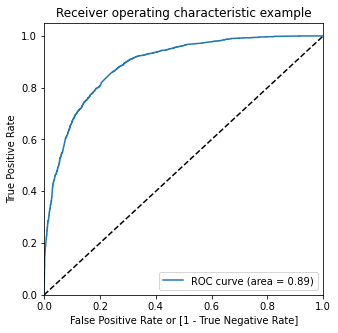

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_probaility, drop_intermediate = False )

# ROC curve function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_probaility)

In [80]:
# Now let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_probaility.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_probaility  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0               0.054415          0    1    0    0    0    0    0   
1          0               0.080480          0    1    0    0    0    0    0   
2          0               0.647817          1    1    1    1    1    1    1   
3          1               0.629597          1    1    1    1    1    1    1   
4          1               0.915596          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    1    0    0    0  
3    1    0    0    0  
4    1    1    1    1

In [81]:
# Now let's calculate accuracy ,sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total1
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.600535  0.984056  0.360307
0.2   0.2  0.767596  0.919460  0.672471
0.3   0.3  0.791371  0.874489  0.739309
0.4   0.4  0.809794  0.763696  0.838668
0.5   0.5  0.813415  0.699101  0.885019
0.6   0.6  0.805228  0.636549  0.910883
0.7   0.7  0.780822  0.519215  0.944686
0.8   0.8  0.761140  0.431316  0.967734
0.9   0.9  0.711541  0.270646  0.987708


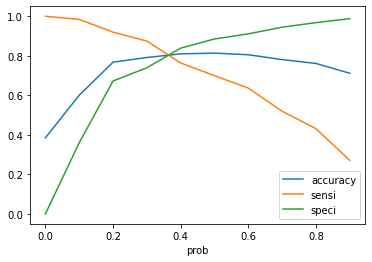

In [82]:
# Plotting accuracy ,sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [83]:
# Now Creating new column "Final_Predicted" with optimum Cutoff point 0.36
y_train_pred_final["Final_Predicted"]=y_train_pred_final["Conversion_probaility"].apply(lambda x:1 if x>0.36 else 0)

# Checking the Dataframe
y_train_pred_final.reset_index(drop=True,inplace=True)
y_train_pred_final.head()

Converted  Conversion_probaility  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0               0.054415          0    1    0    0    0    0    0   
1          0               0.080480          0    1    0    0    0    0    0   
2          0               0.647817          1    1    1    1    1    1    1   
3          1               0.629597          1    1    1    1    1    1    1   
4          1               0.915596          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  Final_Predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    1    0    0    0                1  
3    1    0    0    0                1  
4    1    1    1    1                1

In [84]:
# Checking the overall accuracy again
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted))

0.8074319004881121


In [85]:
# Creating Confusion matrix again
confusion2=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)

confusion2

array([[3187,  718],
       [ 505, 1941]], dtype=int64)

In [86]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [87]:
# Calculating Sensitivity 
TP / float(TP+FN)

0.7935404742436631

In [88]:
# Calculating Specificity
TN / float(TN+FP)

0.8161331626120358

So from the Optimum Cutoff Point of 0.36 we have 
- Accuracy of 80%
- Sensitivity of 79%
- Specificity of 81%

## Prediction of Test data set

In [89]:
# Once overall of test data set
Lead_final_test.head()

Converted  TotalVisits  Total Time Spent on Website  \
3271          0     0.015936                     0.070530   
1490          1     0.019920                     0.679695   
7936          0     0.007968                     0.033243   
4216          1     0.000000                     0.000000   
3830          0     0.031873                     0.073675   

      Page Views Per Visit  Lead Origin_landing page submission  \
3271              0.166667                                    0   
1490              0.208333                                    1   
7936              0.083333                                    0   
4216              0.000000                                    0   
3830              0.333333                                    1   

      Lead Origin_lead add form  Lead Origin_lead import  Lead Source_blog  \
3271                          0                        0                 0   
1490                          0                        0                 0   
7936                          0                        0                 0   
4216                          1                        0                 0   
3830                          0                        0                 0   

      Lead Source_click2call  Lead Source_direct traffic  \
3271                       0                           0   
1490                       0                           1   
7936                       0                           0   
4216                       0                           0   
3830                       0                           0   

      Lead Source_facebook  Lead Source_google  Lead Source_live chat  \
3271                     0                   1                      0   
1490                     0                   0                      0   
7936                     0                   1                      0   
4216                     0                   0                      0   
3830                     0                   0                      0   

      Lead Source_nc_edm  Lead Source_olark chat  Lead Source_organic search  \
3271                   0                       0                           0   
1490                   0                       0                           0   
7936                   0                       0                           0   
4216                   0                       0                           0   
3830                   0                       0                           1   

      Lead Source_pay per click ads  Lead Source_press_release  \
3271                              0                          0   
1490                              0                          0   
7936                              0                          0   
4216                              0                          0   
3830                              0                          0   

      Lead Source_reference  Lead Source_referral sites  \
3271                      0                           0   
1490                      0                           0   
7936                      0                           0   
4216                      1                           0   
3830                      0                           0   

      Lead Source_social media  Lead Source_testone  Lead Source_welearn  \
3271                         0                    0                    0   
1490                         0                    0                    0   
7936                         0                    0                    0   
4216                         0                    0                    0   
3830                         0                    0                    0   

      Lead Source_welearnblog_home  Lead Source_welingak website  \
3271                             0                             0   
1490                             0                             0   
7936                             0                             0   
4216 

In [90]:
# Spliting test data into  x and y 
y_test=Lead_final_test.pop("Converted")
X_test=Lead_final_test

In [91]:
# Checking the shape of X_test and y_test
print(X_test.shape)
print(y_test.shape)

(2723, 103)
(2723,)


In [92]:
# Select the columns in X_train dataset for X_test dataset
X_test = X_test[col]
# Adding constant
X_test_1= sm.add_constant(X_test[col])

In [93]:
# Making prediction on test data set
y_test_pred=lr.predict(X_test_1)

# Checking y_test_pred
y_test_pred

3271    0.052832
1490    0.966994
7936    0.041751
4216    0.824179
3830    0.042034
          ...   
850     0.128806
2879    0.243057
6501    0.877623
7155    0.071029
376     0.055464
Length: 2723, dtype: float64

In [94]:
# Creating new dataframe for test data set for actual and predicted value
y_test_pred_final=pd.DataFrame({"Actual_Converted":y_test,"Conversion_probability":y_test_pred})

# Checking the new dataframe
y_test_pred_final.reset_index(drop=True,inplace=True)
y_test_pred_final

Actual_Converted  Conversion_probability
0                    0                0.052832
1                    1                0.966994
2                    0                0.041751
3                    1                0.824179
4                    0                0.042034
...                ...                     ...
2718                 0                0.128806
2719                 0                0.243057
2720                 1                0.877623
2721                 0                0.071029
2722                 0                0.055464

[2723 rows x 2 columns]

In [95]:
# Creating new column "predicted" with cutoff of 0.37
y_test_pred_final["Predicted"]=y_test_pred_final["Conversion_probability"].apply(lambda x:1 if x>0.37 else 0)

# Checking dataframe
y_test_pred_final.head()

Actual_Converted  Conversion_probability  Predicted
0                 0                0.052832          0
1                 1                0.966994          1
2                 0                0.041751          0
3                 1                0.824179          1
4                 0                0.042034          0

In [96]:
# Checking the accuracy score
print(metrics.accuracy_score(y_test_pred_final["Actual_Converted"],y_test_pred_final["Predicted"]))

0.8127065736320235


In [97]:
# Creating confusion matrix
confusion_test=metrics.confusion_matrix(y_test_pred_final["Actual_Converted"],y_test_pred_final["Predicted"])
confusion_test

array([[1441,  293],
       [ 217,  772]], dtype=int64)

In [98]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [99]:
# Calculating Sensitivity 
TP / float(TP+FN)

0.7805864509605662

In [100]:
# Calculating Specificity
TN / float(TN+FP)

0.8310265282583622

 So with cutoff of 0.37 we have
    Accuracy score = 81%
    Sensitivity=78%
    Specificity=83%  on test data set

## Precision and Recall

In [101]:
#Looking at the confusion matrix again
confusion2=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)

confusion2

array([[3187,  718],
       [ 505, 1941]], dtype=int64)

In [102]:
# Precision (TP / TP + FP)
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7299736743136518

In [103]:
# Recall (TP / TP + FN)
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7935404742436631

## Precision and Recall Trade-off

In [104]:
# importing the precision recall curve package
from sklearn.metrics import precision_recall_curve

In [105]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [106]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_probaility)

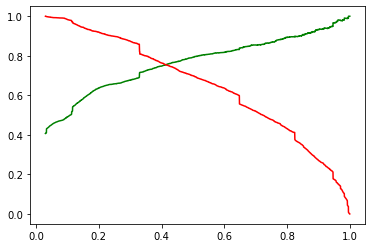

In [107]:
# plotting the threshold and recall graph
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [108]:
# Making prediction with 0.41 cutoff
y_train_pred_final["Revised_final_Prediction"]=y_train_pred_final["Conversion_probaility"].apply(lambda x:1 if x>0.41 else 0)

y_train_pred_final

Converted  Conversion_probaility  Predicted  0.0  0.1  0.2  0.3  0.4  \
0             0               0.054415          0    1    0    0    0    0   
1             0               0.080480          0    1    0    0    0    0   
2             0               0.647817          1    1    1    1    1    1   
3             1               0.629597          1    1    1    1    1    1   
4             1               0.915596          1    1    1    1    1    1   
...         ...                    ...        ...  ...  ...  ...  ...  ...   
6346          0               0.185320          0    1    1    0    0    0   
6347          1               0.852218          1    1    1    1    1    1   
6348          0               0.946148          1    1    1    1    1    1   
6349          0               0.214178          0    1    1    1    0    0   
6350          0               0.520643          1    1    1    1    1    1   

      0.5  0.6  0.7  0.8  0.9  Final_Predicted  Revised_final_Prediction  
0       0    0    0    0    0                0                         0  
1       0    0    0    0    0                0                         0  
2       1    1    0    0    0                1                         1  
3       1    1    0    0    0                1                         1  
4       1    1    1    1    1                1                         1  
...   ...  ...  ...  ...  ...              ...                       ...  
6346    0    0    0    0    0                0                         0  
6347    1    1    1    1    0                1                         1  
6348    1    1    1    1    1                1                         1  
6349    0    0    0    0    0                0                         0  
6350    1    0    0    0    0                1                         1  

[6351 rows x 15 columns]

In [109]:
# Checking the accuracy score
print(metrics.accuracy_score(y_train_pred_final["Converted"],y_train_pred_final["Revised_final_Prediction"]))

0.8108959219020627


In [110]:
# Creating confusion matrix
confusion_3=metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["Revised_final_Prediction"])
confusion_3

array([[3298,  607],
       [ 594, 1852]], dtype=int64)

In [111]:
TP = confusion_3[1,1] # true positive 
TN = confusion_3[0,0] # true negatives
FP = confusion_3[0,1] # false positives
FN = confusion_3[1,0] # false negatives

In [112]:
# Precision (TP / TP + FP)
confusion_3[1,1]/(confusion_3[0,1]+confusion_3[1,1])

0.7531516876779178

In [113]:
# Recall (TP / TP + FN)
confusion_3[1,1]/(confusion_3[1,0]+confusion_3[1,1])

0.7571545380212592

So with cutoff of 0.41 we get Accuracy of 81% , Precision of 75% and Recall 75%

## Prediction on Test data set with 0.41 of Cutoff

In [114]:
# # Making prediction with 0.41 cutoff
y_test_pred_final["Final_prediction"]=y_test_pred_final["Conversion_probability"].apply(lambda x:1 if x>0.41 else 0)

y_test_pred_final

Actual_Converted  Conversion_probability  Predicted  Final_prediction
0                    0                0.052832          0                 0
1                    1                0.966994          1                 1
2                    0                0.041751          0                 0
3                    1                0.824179          1                 1
4                    0                0.042034          0                 0
...                ...                     ...        ...               ...
2718                 0                0.128806          0                 0
2719                 0                0.243057          0                 0
2720                 1                0.877623          1                 1
2721                 0                0.071029          0                 0
2722                 0                0.055464          0                 0

[2723 rows x 4 columns]

In [115]:
# Checking overall accuracy
print(metrics.accuracy_score(y_test_pred_final["Actual_Converted"], y_test_pred_final["Final_prediction"]))

0.8200514138817481


In [116]:
# Creating confusion metrix 
confusion_test_final=metrics.confusion_matrix(y_test_pred_final["Actual_Converted"], y_test_pred_final["Final_prediction"])
confusion_test_final

array([[1478,  256],
       [ 234,  755]], dtype=int64)

In [117]:
TP = confusion_test_final[1,1] # true positive 
TN = confusion_test_final[0,0] # true negatives
FP = confusion_test_final[0,1] # false positives
FN = confusion_test_final[1,0] # false negatives

In [118]:
# Calculating Precision (TP / TP + FP)
confusion_test_final[1,1]/(confusion_test_final[0,1]+confusion_test_final[1,1])

0.7467853610286844

In [119]:
# Calculating Recall (TP / TP + FN)
confusion_test_final[1,1]/(confusion_test_final[1,0]+confusion_test_final[1,1])

0.7633973710819009

 So with cutoff of 0.41 we have Accuaracy of 82% , Precision of 74% and Recall of 76%. 

# Step 8- Busniess Recommendation

#### So from the Final model(3) we have the top 5 variable which responsible for lead conversion most.

1. Total Visits 
2. Total time spent on website
3. Last activity 
   - Phone conversation
4. Lead origin
   - Lead add form.
5. Current occupation
   - Working professional

So these are the top variable by which X Education company can achieve there target of Lead conversion rate to 80%

#### Other factor we can also be consider to increase the lead conversion rate

- Lead Source
    from Welingak Website
- Last activity as SMS sent